In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

%config InlineBackend.figure_format = "retina"
%matplotlib inline

In [2]:
x = np.array([-2, -1, 0.5, 1, 3.5])
y = np.array([1, 3, 2.5, -0.5, 3])


def cov(x1, x2):
    
    return np.exp(-1/2*np.subtract.outer(x1, x2)**2)


def posterior_para(x_new):
    """
    returns mu_post, Sigma_post
    """
    k_star = cov(x_new, x)
    k = cov(x, x)
    
    return k_star@np.linalg.inv(k)@y, cov(x_new, x_new) - k_star@np.linalg.inv(k)@k_star.T

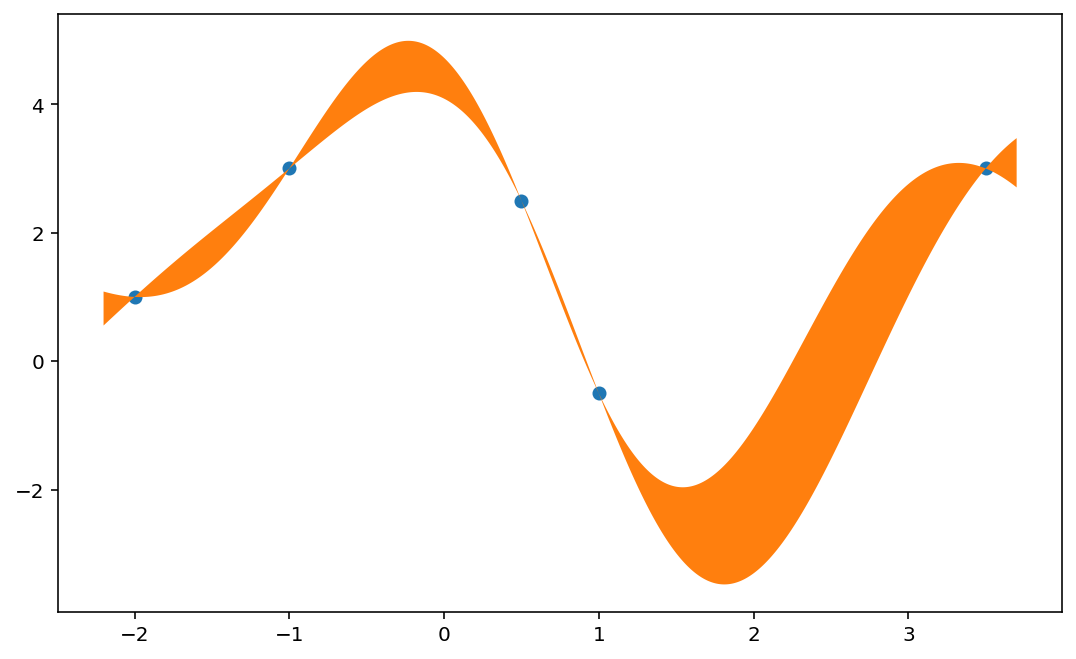

In [3]:
x_plot = np.linspace(-2.2, 3.7, num=1001)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(9, 5.5))
plt.scatter(x, y)

mu_post, Sigma_post = posterior_para(x_plot)
z = st.norm.ppf(0.975)
upper = mu_post + z*np.sqrt(np.diag(Sigma_post))
lower = mu_post - z*np.sqrt(np.diag(Sigma_post))

plt.fill_between(x_plot, lower, upper)

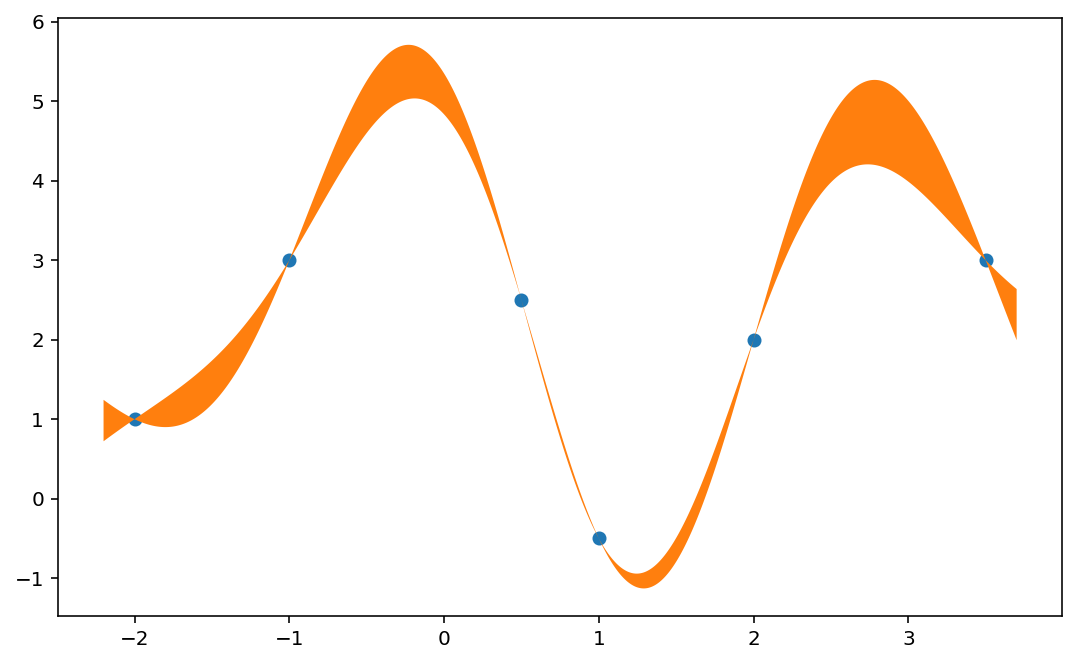

In [4]:
# Adding (2, 2) as an observation
x = np.append(x, 2)
y = np.append(y, 2)

x_plot = np.linspace(-2.2, 3.7, num=1001)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(9, 5.5))
plt.scatter(x, y)

mu_post, Sigma_post = posterior_para(x_plot)
z = st.norm.ppf(0.975)
upper = mu_post + z*np.sqrt(np.diag(Sigma_post))
lower = mu_post - z*np.sqrt(np.diag(Sigma_post))

plt.fill_between(x_plot, lower, upper)